In [1]:
#qiskit-ignis
#energy relaxation issue after some t_o
#measurement error mitigation

In [3]:
from qiskit import *
nqubits = 3
circuit = QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])

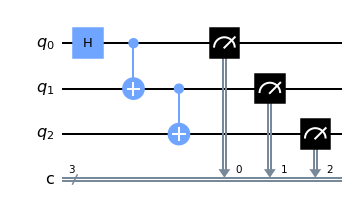

In [4]:
%matplotlib inline
circuit.draw(output='mpl')

In [33]:
#simulator=Aer.get_backend('qasm_simulator')
#backend=simulator
#shots=1024
sim_result=execute(circuit,
                   backend=Aer.get_backend('qasm_simulator'),
                   shots=1024).result()

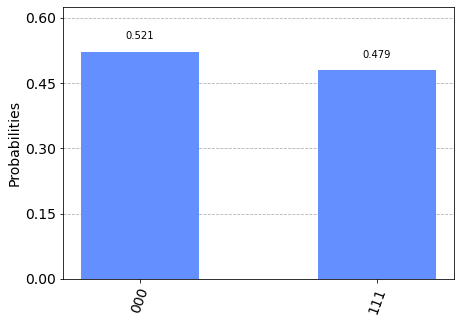

In [34]:
from qiskit.visualization import *
plot_histogram(sim_result.get_counts(circuit))

In [35]:
#IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
qcomp=provider.get_backend('ibmq_manila')
job=execute(circuit,
            backend=qcomp,
            shots=1024)
print(job.job_id())
#from qiskit.tools.monitor import job_monitor
job_monitor(job)

6295400ee3e89f92e1d4726d
Job Status: job has successfully run


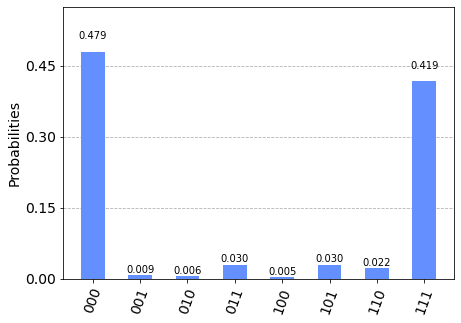

In [36]:
#device_result=job.result()
plot_histogram(job.result().get_counts(circuit))

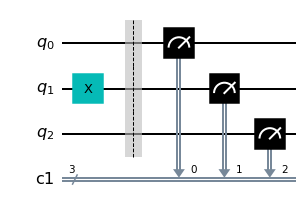

In [37]:
from qiskit.ignis.mitigation.measurement import * #(complete_meas_cal,CompleteMeasFitter)
cal_circuits,state_labels=complete_meas_cal(qr=circuit.qregs[0],
                                            circlabel='measerrormitigationcal')
cal_circuits[2].draw(output='mpl')

In [12]:
len(cal_circuits)

8

In [38]:
calibration=execute(cal_circuits,
               backend=qcomp,
               shots=1024,
               optimization_level=0)
print(calibration.job_id())
job_monitor(calibration)
#cal_results=calibration.result()

6295409b8cd6b204bf018d2a
Job Status: job has successfully run


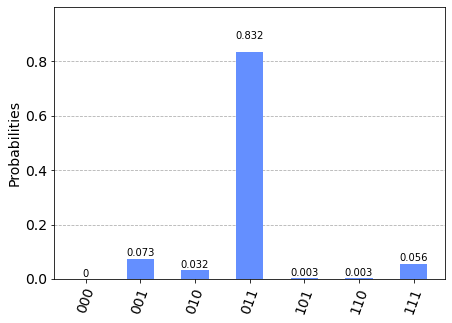

In [39]:
plot_histogram(calibration.result().get_counts(cal_circuits[3]))

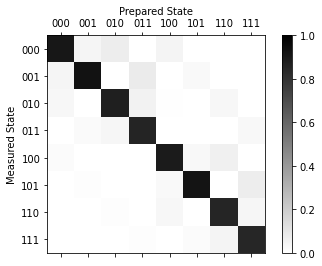

In [40]:
meas_fitter=CompleteMeasFitter(cal_results,state_labels)
meas_fitter.plot_calibration()

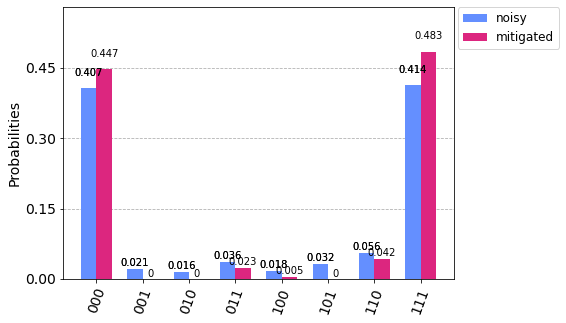

In [41]:
meas_filter=meas_fitter.filter
mitigated_result=meas_filter.apply(device_result)
device_counts=device_result.get_counts(circuit)
mitigated_counts=mitigated_result.get_counts(circuit)
plot_histogram([device_counts,mitigated_counts],
               legend=['noisy','mitigated']) #comparison

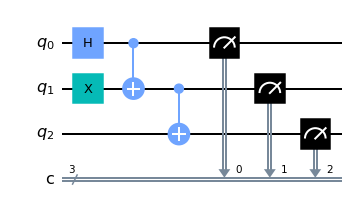

In [18]:
circuit2=QuantumCircuit(nqubits,nqubits)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2],[0,1,2])
circuit2.draw(output='mpl')

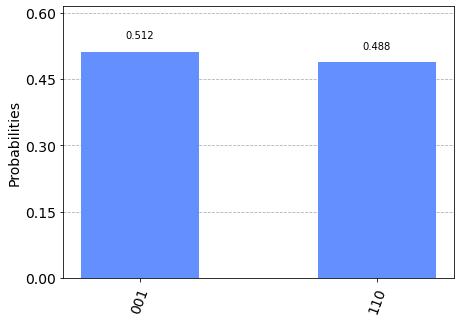

In [42]:
plot_histogram(execute(circuit2,
                       backend=simulator,
                       shots=1024).result().get_counts(circuit2)
    )

In [48]:
dev2_job=execute(circuit2,
               backend=qcomp,
               shots=1024,
               optimization_level=3)
#print(dev2_job.job_id())
job_monitor(dev2_job)

Job Status: job has successfully run


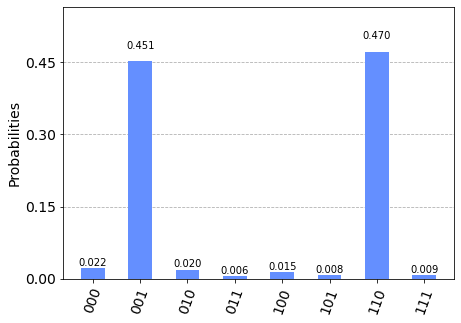

In [67]:
device_counts_2=dev2_job.result().get_counts(circuit2)
#job_monitor(dev2_job)
plot_histogram(device_counts_2)
#print(dev2_job.result().get_statevector)

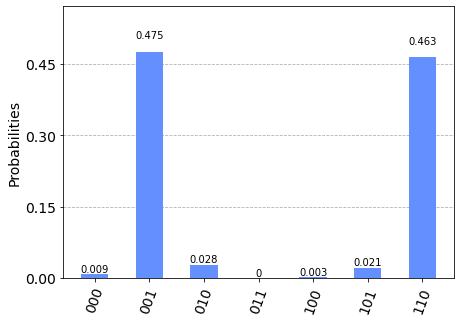

In [45]:
dev_mitigated_results_counts2=meas_filter.apply(device_counts_2)
plot_histogram(dev_mitigated_results_counts2)

In [63]:
#import qiskit.tools.jupyter
%qiskit_copyright
#%qiskit_version_table